## FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [ ]:
# Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Preparation and Exploration

### 1.Data Loading: 

In [4]:
df = pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\New folder\Timeseries\Timeseries\exchange_rate.csv',parse_dates=['date'], index_col='date')
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [5]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


### 2.Initial Exploration:

In [ ]:
# Plot the time series to observe trends, seasonality, and anomalies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


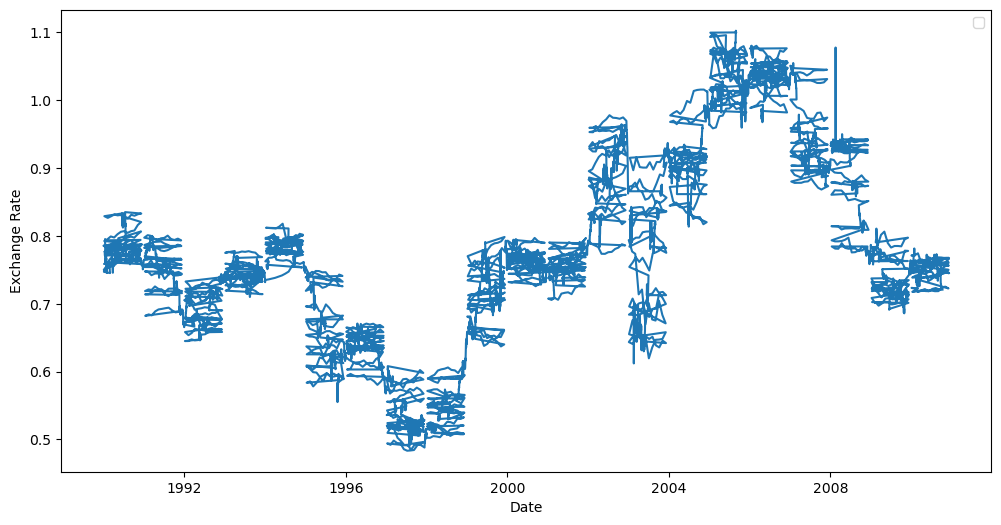

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'])
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

### 3.Data Preprocessing:

In [12]:
# Check for missing values
df.isnull().sum()

Ex_rate    0
dtype: int64

## Model Building - ARIMA

### 1.Parameter Selection for ARIMA:

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

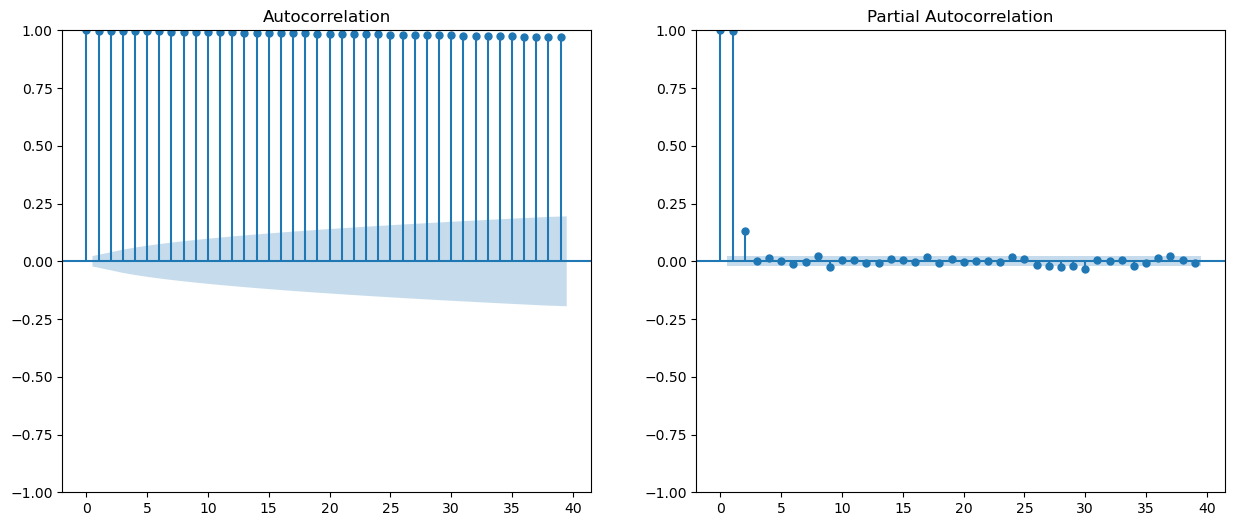

In [14]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(df['Ex_rate'], ax=ax[0])
plot_pacf(df['Ex_rate'], ax=ax[1])
plt.show()

### 2.Model Fitting:

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
arima_result = model.fit()

C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Windows\New folder\Lib\site-packages\statsm

In [18]:
# Summary of the model
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 25 Oct 2024   AIC                         -56102.322
Time:                        12:51:42   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3. Diagnostics:

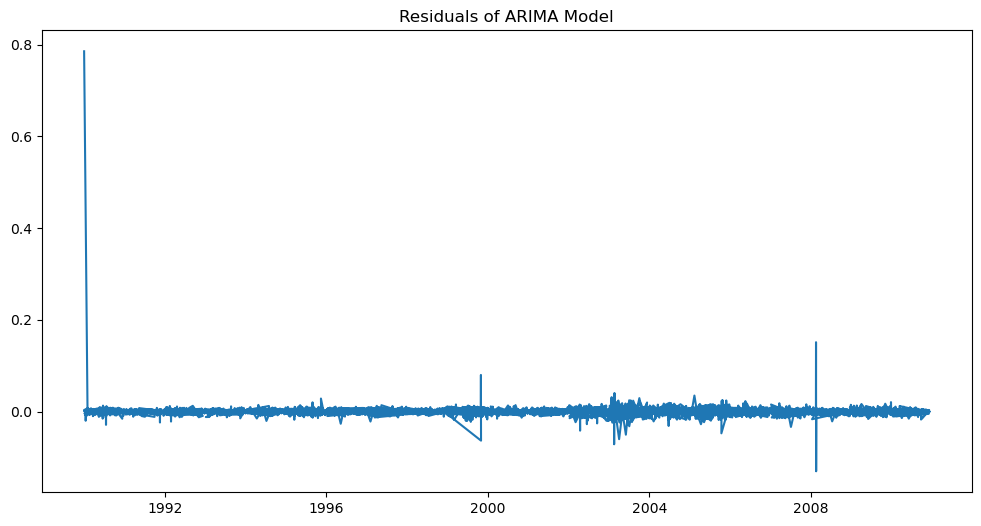

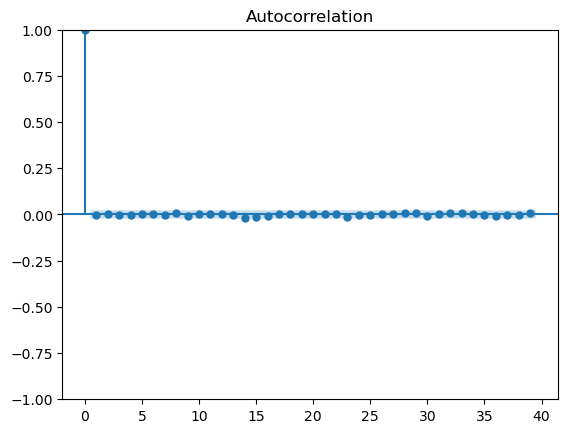

In [21]:
# Plot residuals
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()
# Plot ACF of residuals
plot_acf(residuals)
plt.show()

### 4.Forecasting:

In [22]:
# Forecast the next 30 days
forecast = arima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='D')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


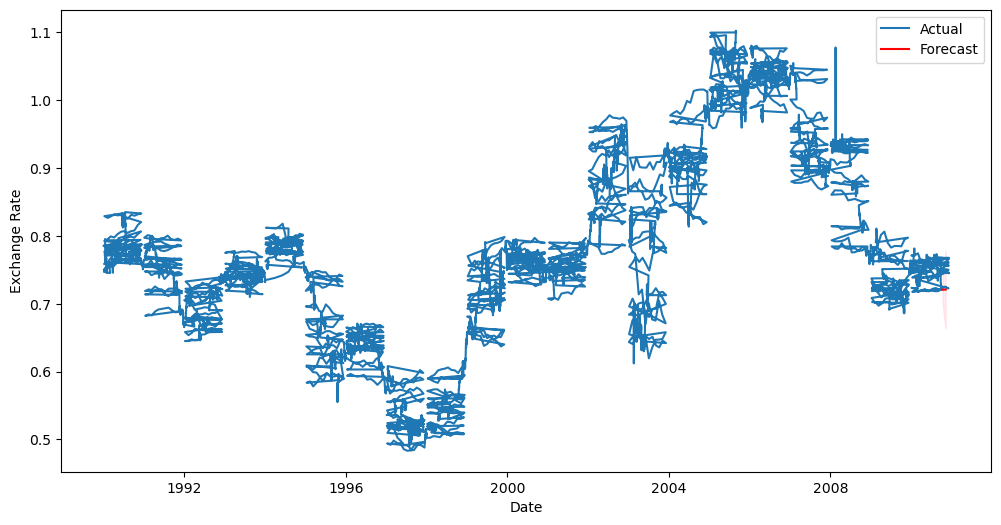

In [23]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label="Actual")
plt.plot(forecast_index, forecast_values, label="Forecast", color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

## Model Building - Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
# Select and fit the model (Holt's Linear model in this example)
es_model = ExponentialSmoothing(df['Ex_rate'], trend="additive").fit()
es_model.summary()

C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77641.009
Trend:,Additive,BIC,-77613.272
Seasonal:,None,AICC,-77640.998
Seasonal Periods:,None,Date:,"Fri, 25 Oct 2024"
Box-Cox:,False,Time:,12:57:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8700408,alpha,True
smoothing_trend,0.000000,beta,True


In [30]:
# Forecast the next 30 days
es_forecast = es_model.forecast(30)
forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='D')

C:\Windows\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


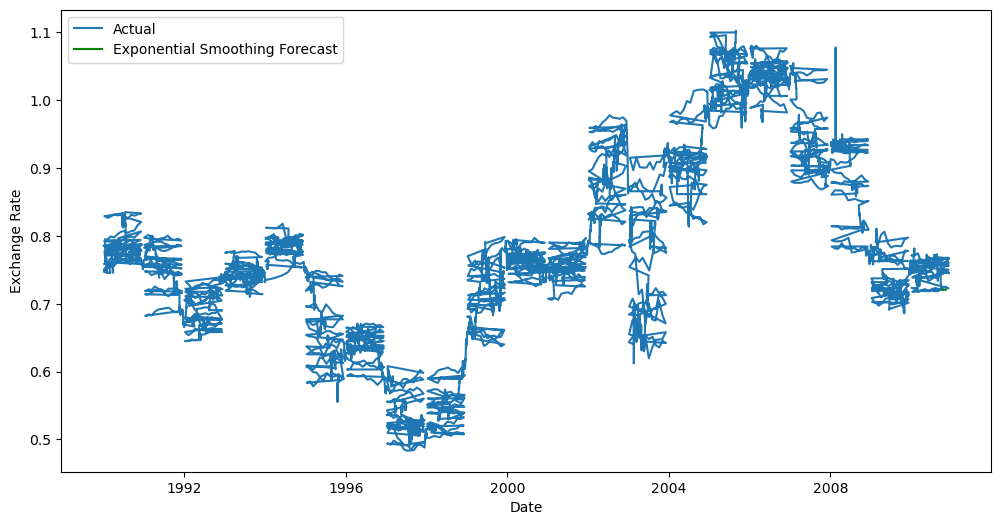

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label="Actual")
plt.plot(forecast_index, es_forecast, label="Exponential Smoothing Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

## Evaluation and Comparison

### 1.Compute Error Metrics:

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
# Define function for RMSE and MAPE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
# Calculate error metrics for ARIMA
arima_forecast_values = forecast.predicted_mean  # From ARIMA forecast
mae_arima = mean_absolute_error(df['Ex_rate'][-30:], arima_forecast_values)
rmse_arima = rmse(df['Ex_rate'][-30:], arima_forecast_values)
mape_arima = mape(df['Ex_rate'][-30:], arima_forecast_values)

In [38]:
# Calculate error metrics for Exponential Smoothing
mae_es = mean_absolute_error(df['Ex_rate'][-30:], es_forecast)
rmse_es = rmse(df['Ex_rate'][-30:], es_forecast)
mape_es = mape(df['Ex_rate'][-30:], es_forecast)

In [39]:
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}")

ARIMA - MAE: 0.01272400648930223, RMSE: 0.01698271091275075, MAPE: nan
Exponential Smoothing - MAE: 0.012755758699259231, RMSE: 0.017005232255205345, MAPE: nan
